In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CWC23_all_innings.csv")

In [3]:
team_performance = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': lambda x: x.value_counts().index[0]
}).reset_index()

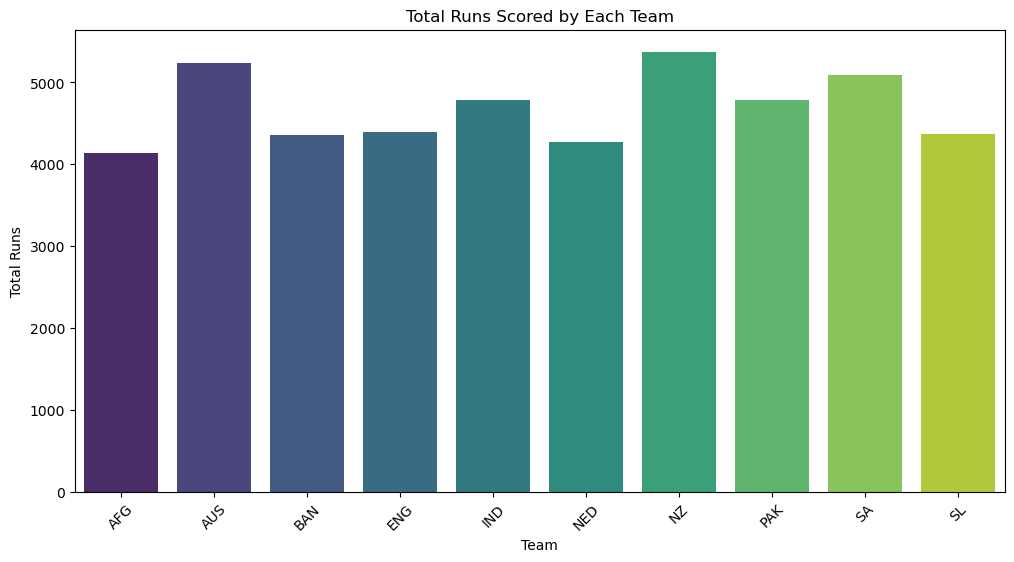

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='runs', data=team_performance, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

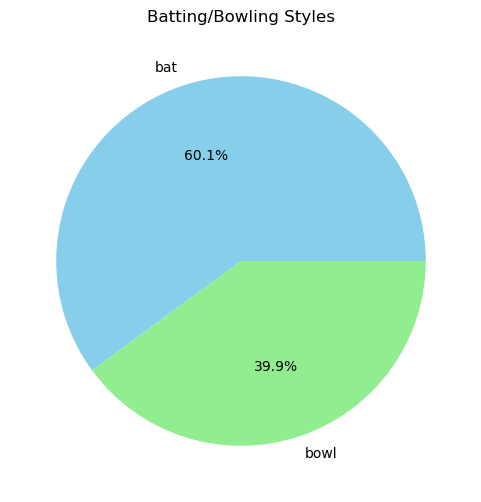

In [5]:
bat_bowl_styles = df['bat_or_bowl'].value_counts()

# Visualization
plt.figure(figsize=(6, 6))
bat_bowl_styles.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Batting/Bowling Styles')
plt.ylabel('')
plt.show()


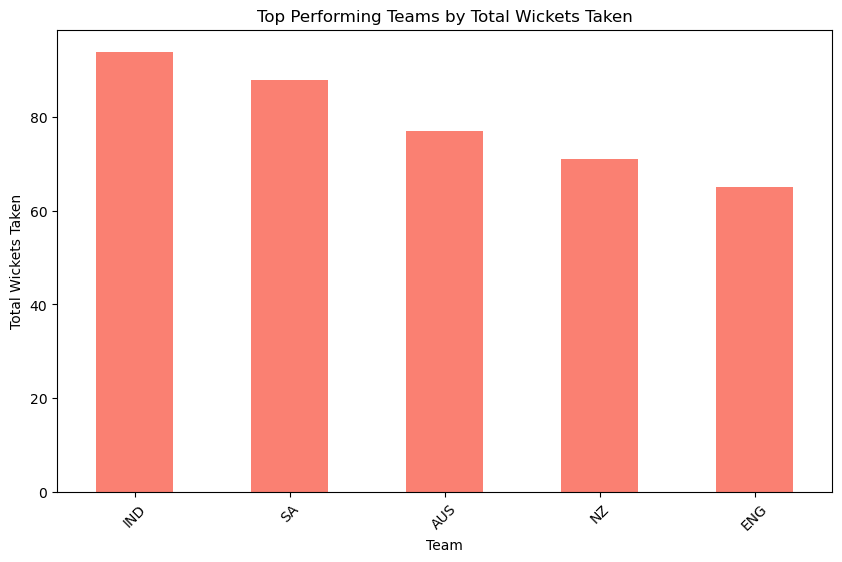

In [6]:

top_teams = df.groupby('team')['wkts'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_teams.plot(kind='bar', color='salmon')
plt.title('Top Performing Teams by Total Wickets Taken')
plt.xlabel('Team')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45)
plt.show()

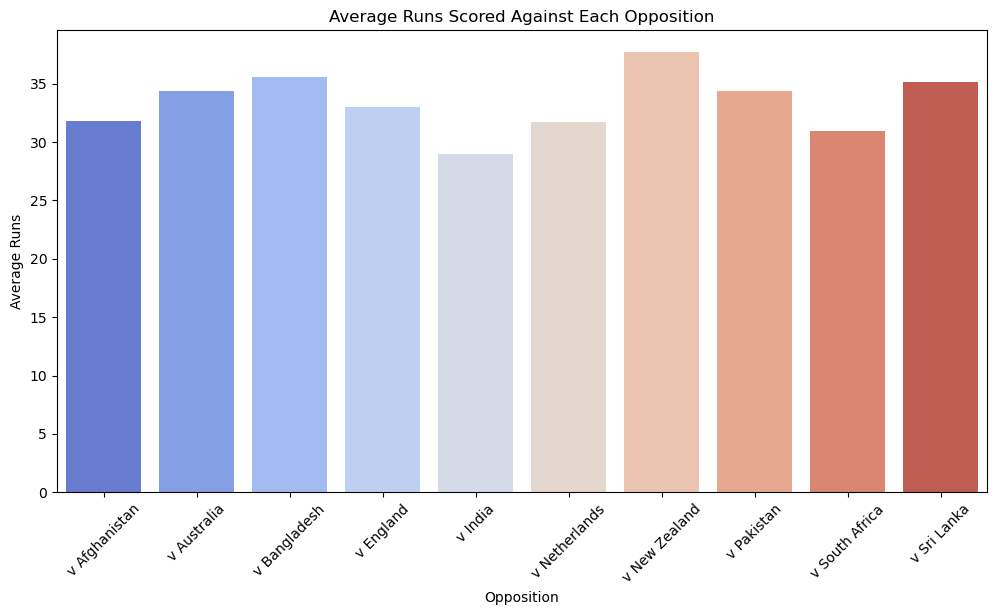

In [7]:
opposition_performance = df.groupby('opposition').agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='runs', data=opposition_performance, palette='coolwarm')
plt.title('Average Runs Scored Against Each Opposition')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

In [8]:
player_stats = df.groupby('player').agg({
    'runs': 'sum',
    'wkts': 'sum'
})

leading_run_scorers = player_stats.nlargest(5, 'runs')

leading_wicket_takers = player_stats.nlargest(5, 'wkts')

print("Leading Run-Scorers:")
print(leading_run_scorers)
print("\nLeading Wicket-Takers:")
print(leading_wicket_takers)

Leading Run-Scorers:
                          runs  wkts
player                              
R Ravindra (NZ)            971   5.0
V Kohli (IND)              726   1.0
GJ Maxwell (AUS)           693   5.0
BFW de Leede (NED)         626  16.0
Azmatullah Omarzai (AFG)   623   7.0

Leading Wicket-Takers:
                      runs  wkts
player                          
Mohammed Shami (IND)   214  23.0
A Zampa (AUS)          519  22.0
D Madushanka (SL)      553  21.0
G Coetzee (SA)         450  20.0
JJ Bumrah (IND)        347  18.0


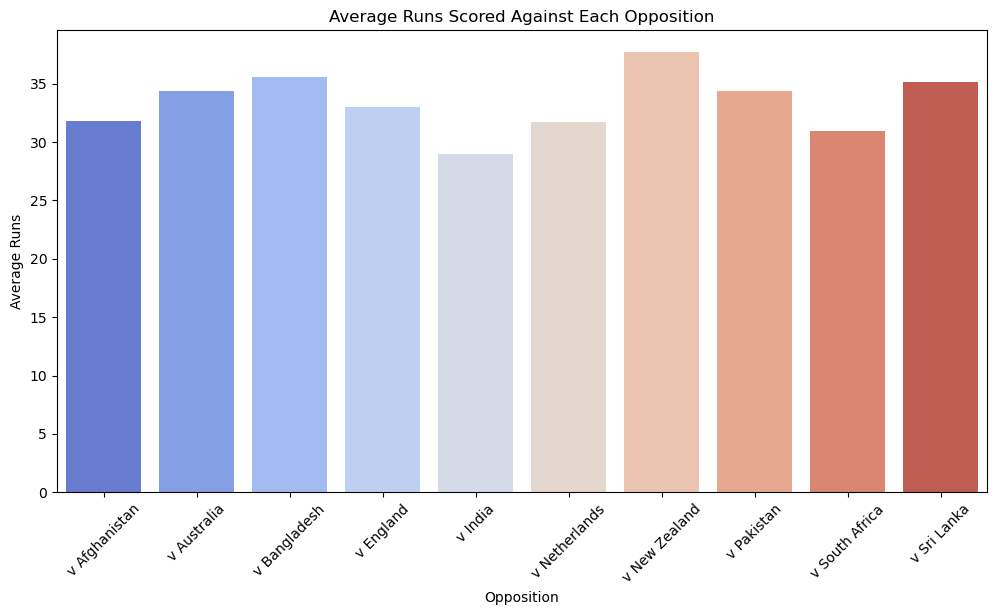

In [9]:
opposition_performance = df.groupby('opposition').agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='runs', data=opposition_performance, palette='coolwarm')
plt.title('Average Runs Scored Against Each Opposition')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

In [10]:
team_opposition_performance = df.groupby(['team', 'opposition']).agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

# Identify players that excel against specific oppositions
player_opposition_performance = df.groupby(['player', 'opposition']).agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

# Identify teams and players that excel on specific grounds
team_ground_performance = df.groupby(['team', 'ground']).agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

player_ground_performance = df.groupby(['player', 'ground']).agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

print("Teams' Performance against specific oppositions:")
print(team_opposition_performance.head())

print("\nPlayers' Performance against specific oppositions:")
print(player_opposition_performance.head())

print("\nTeams' Performance on specific grounds:")
print(team_ground_performance.head())

print("\nPlayers' Performance on specific grounds:")
print(player_ground_performance.head())

Teams' Performance Against Specific Oppositions:
  team     opposition       runs      wkts
0  AFG    v Australia  43.307692  1.000000
1  AFG   v Bangladesh  18.937500  0.500000
2  AFG      v England  28.235294  1.666667
3  AFG        v India  32.812500  0.333333
4  AFG  v Netherlands  31.454545  1.000000

Players' Performance Against Specific Oppositions:
         player     opposition  runs  wkts
0  A Dutt (NED)  v Afghanistan  29.5   0.0
1  A Dutt (NED)    v Australia  30.0   1.0
2  A Dutt (NED)   v Bangladesh  17.5   1.0
3  A Dutt (NED)      v England  34.0   2.0
4  A Dutt (NED)        v India  28.5   0.0

Teams' Performance on Specific Grounds:
  team      ground       runs      wkts
0  AFG   Ahmedabad  26.277778  0.714286
1  AFG     Chennai  36.037037  1.083333
2  AFG       Delhi  30.454545  1.000000
3  AFG  Dharamsala  18.937500  0.500000
4  AFG     Lucknow  31.454545  1.000000

Players' Performance on Specific Grounds:
         player        ground  runs  wkts
0  A Dutt (NED)  

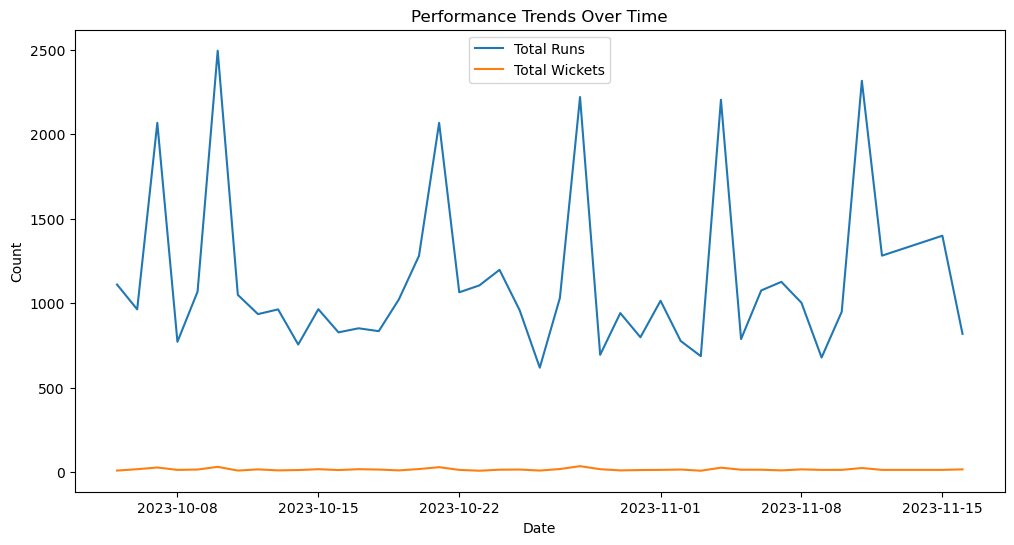

In [12]:
df['start_date'] = pd.to_datetime(df['start_date'])

temporal_analysis = df.groupby('start_date').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Plotting temporal patterns for team and player performance
plt.figure(figsize=(12, 6))
plt.plot(temporal_analysis['start_date'], temporal_analysis['runs'], label='Total Runs')
plt.plot(temporal_analysis['start_date'], temporal_analysis['wkts'], label='Total Wickets')
plt.title('Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()